# Following is a demo on the comparison of classifiers in the prescence of high dimensional gaussion noise

## Experiment Specifications

The following is modified from scikit learn's example on classifier comparison. 
Three synthetic datasets are created using the inbuilt functions from scikit learn - make_classification, make_moons and make circles as per the original demo.

Each input dataset is configured to have 100 samples and 2 dimensions(features) initially.

During the experiment, we sample gaussion noise of variance values = 0.1, 1, 10 spanning additional noise dimensions from 1 to 1500 in number.

Each noise dimension of a particular variance value is sampled and concatenated to the sampled input dataset. 

Post this, the data in addition to the noise dimension is split into training and testing data and the three classifiers- Support Vector Machines, Random Forest and KNN are fitted to the data.
This is repeated across 50 trails per accuracy score with respect to the classifier and plotted.

We compare the accuracies across SVM, RF and KNN with respect to the number of noise dimensions through a plot of "Accuracy Vs. Noise Dimensions"
We expect to see Random Forest outperform SVM and KNN in the presence of high variance - high dimensional noise as it is known to be invariant to the variance of noise.


In [1]:
#import all packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns

In [2]:
#initialize the classifiers
names = ["SVM", "Random Forest", "KNN" ]
classifiers = [
          svm.SVC(kernel='linear'), 
          RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt'),
          KNeighborsClassifier(n_neighbors=3)]

In [3]:
#function to calculate the accuracy 
def fit_predict(train_data, train_label, size):
    accuracies = []
    for name, model in zip(names, classifiers):
        X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=size)
        
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        accuracies.append(score)
    
    SVM_acc = accuracies[0]
    RF_acc = accuracies[1]
    KNN_acc = accuracies[2]

    return SVM_acc,RF_acc,KNN_acc
    

In [4]:
#function to repeatedly add noise of a particular variance and dimension value
def add_noise(data, mu, var, dim):
    n = data.shape[0]
    noise = np.random.normal(mu, var, size = [n, dim])
    data = np.concatenate([data,noise],axis = 1)
    return data

In [5]:
#Initialization of input datasets
def datasets():
    X1,Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
    X1 = preprocessing.StandardScaler().fit_transform(X1)
    X2,Y2 = make_moons(noise=0.3)
    X2 = preprocessing.StandardScaler().fit_transform(X2)
    X3,Y3 = make_circles(noise=0.2, factor=0.5)
    X3 = preprocessing.StandardScaler().fit_transform(X3)
    
    input_data = [X1,X2,X3]
    input_label = [Y1,Y2,Y3]
    return input_data, input_label


In [6]:
#Function for plotting
def plot(rf,svm,knn,n1,axes):
    
    plt.sca(axes)
    sns.set_context('talk', font_scale=0.7)
    
    sns.lineplot(n1, rf)
    sns.lineplot(n1, svm)
    sns.lineplot(n1, knn)
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.set_xscale('log')
    axes.yaxis.set_major_locator(plt.MaxNLocator(2))


## Computation of accuracy
The following function is the main part of the experiment.\
Calling this function, we calculate the accuracy for RF,SVM and KNN based on the input parameters of the corresponding dataset, variance value and the number of trials we want to run the experiment based on

In [7]:
def compute(ds, var, n_tr):
    
    noise_dims = np.geomspace(1, 1000, 5, dtype=int)
    n_sims = n_tr
    size = 0.25
    rf_acc = []
    svm_acc = []
    knn_acc = []
    n_dims = []

    for d in noise_dims:
        temp_acc1 = []
        temp_acc2 = []
        temp_acc3 = []
    
        for s in range(n_sims):
            da, lab = datasets()
            acc1, acc2, acc3 = fit_predict(add_noise(da[0], 0, 1, d), lab[0], size)
        
            temp_acc1.append(acc1)
            temp_acc2.append(acc2)
            temp_acc3.append(acc3)
            n_dims.append(d)    
        
        rf_acc += temp_acc2
        svm_acc += temp_acc1
        knn_acc += temp_acc3
    return rf_acc,svm_acc,knn_acc,n_dims

## Plot of the input datasets along with the graph of Accuracy Vs Noise dimension for RF, SVM and KNN across vairance values = 0.1, 1, 10 which is shown across the rows

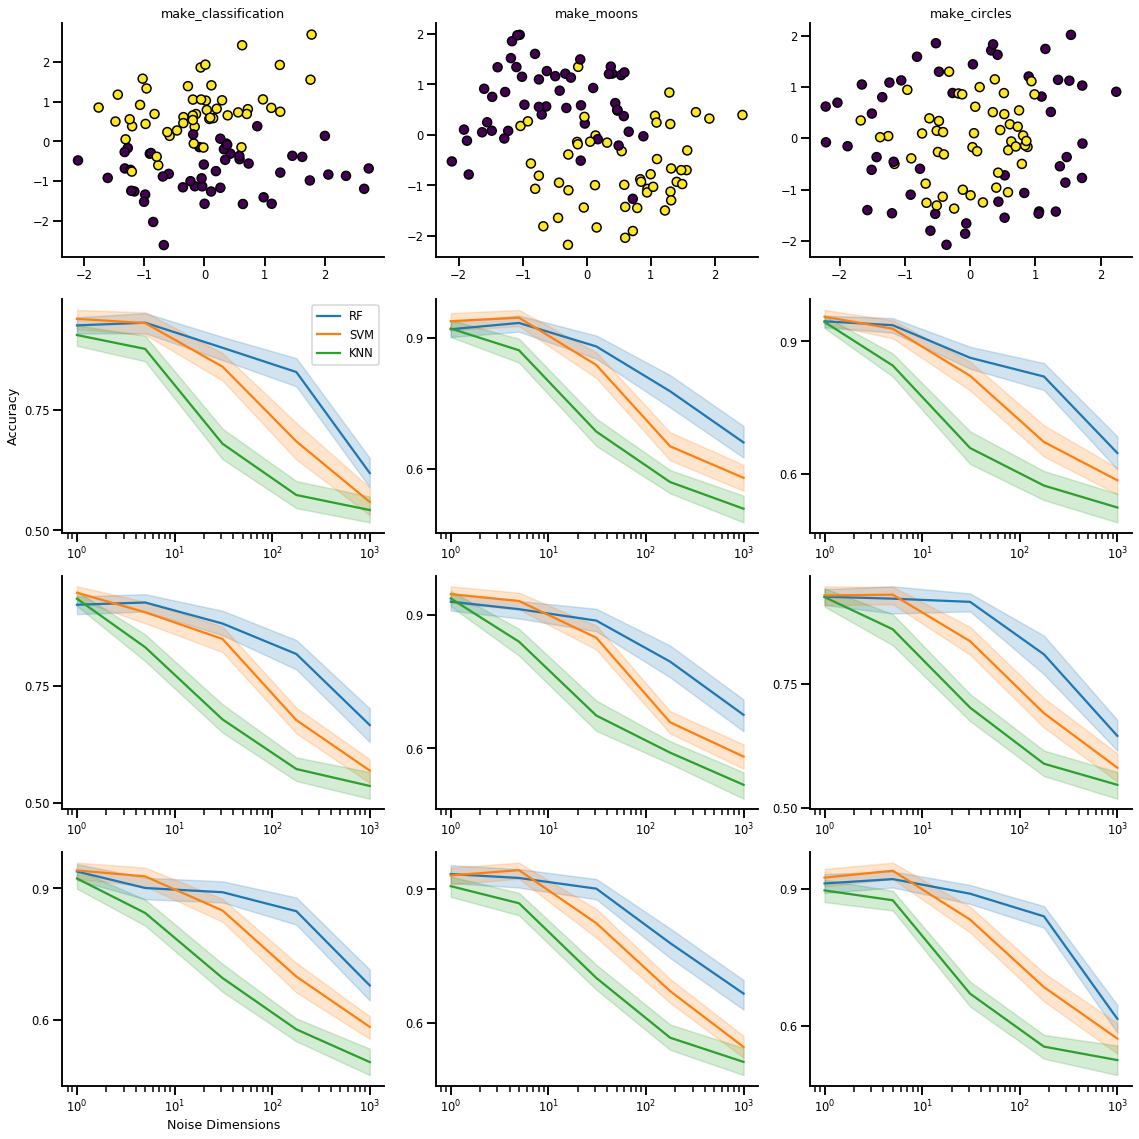

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,16))#sharex=True, sharey=True, figsize=(16,16))

X,Y = datasets()
names=['make_classification','make_moons','make_circles']
for index in range(3):
    data = X[index]
    lab = pd.DataFrame(Y[index])
    lab['y'] = Y[index]
    axes[0][index].scatter(data[:,0],data[:,1], c = lab['y'], edgecolor='black')
    axes[0][index].spines['right'].set_visible(False)
    axes[0][index].spines['top'].set_visible(False)
    axes[0][index].set_title(names[index])


var = [0.1, 1, 10]
n_trial = 50

for i in range(3):
    for j in range(3):
        r,s,k,n = compute(i,var[j], n_trial)
        plot(r,s,k,n,axes[i+1][j])

axes[3][0].set_xlabel("Noise Dimensions")
axes[1][0].set_ylabel("Accuracy")
axes[1][0].legend(['RF', 'SVM', 'KNN'])
fig.tight_layout()
